In [29]:
# Importa biblioteca necessárias
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [22]:
# Leitura da tabela que será utilizada 
WCup = pd.read_csv(r"C:\Users\Bruno Xavier\Desktop\Data Enginer\PythonDataScince\df_\results.csv")
WCup

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44757,2023-07-09,United States,Canada,2,2,Gold Cup,Cincinnati,United States,False
44758,2023-07-12,United States,Panama,1,1,Gold Cup,San Diego,United States,False
44759,2023-07-12,Jamaica,Mexico,0,3,Gold Cup,Paradise,United States,True
44760,2023-07-16,Kernow,Sápmi,2,1,CONIFA World Football Cup qualification,Falmouth,England,False


In [23]:
# times com mais vitórias em Copas do Mundo

# Primeiro localizar como está escrito copa do mundo em 'tournament'

df['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [28]:
# Achei ainda difícil de lozaliar então fiz outro filtro 

WCup = df[df['tournament'].str.contains('World Cup', case=False)]

In [25]:
# Times com mais vitórias em Copas do Mundo

# Times que ganharam mais "em casa"
Vitorias_casa_Wcup = WCup[WCup['home_score'] > WCup['away_score']]

# Times que mais ganharam 'fora de casa'
Vitorias_fora_Wcup = WCup[WCup['home_score'] < WCup['away_score']]

# Contando vitórias por time da casa 
Count_casa_Wcup = Vitorias_casa_Wcup['home_team'].value_counts()

# Contando vitórias por time de fora 
Count_fora_Wcup = Vitorias_fora_Wcup['away_team'].value_counts()

# Vou somar agora para que seja atribuído as vitórias reais de cada time
Vportime_Wcup = Count_casa_Wcup.add(Count_fora_Wcup, fill_value=0)

# Ordenar os times pelo número de vitórias em ordem decrescente
V_Wcup = Vportime_Wcup.sort_values(ascending=False)

# Imprimir
V_Wcup

Brazil                      158.0
Germany                     151.0
Argentina                   133.0
Italy                       123.0
Mexico                      122.0
                            ...  
Gozo                          1.0
Mauritius                     1.0
Monaco                        1.0
Turks and Caicos Islands      1.0
Two Sicilies                  1.0
Name: count, Length: 219, dtype: float64

In [26]:
# Colocar um filtro para acima de 70 vitórias

V_Wcup_filtro = V_Wcup[V_Wcup > 90]
V_Wcup_filtro

Brazil         158.0
Germany        151.0
Argentina      133.0
Italy          123.0
Mexico         122.0
Netherlands    119.0
Spain          118.0
England        116.0
France         109.0
Sweden         105.0
Belgium        104.0
Uruguay        102.0
South Korea    100.0
Portugal       100.0
Russia          99.0
Australia       95.0
Iran            94.0
Name: count, dtype: float64

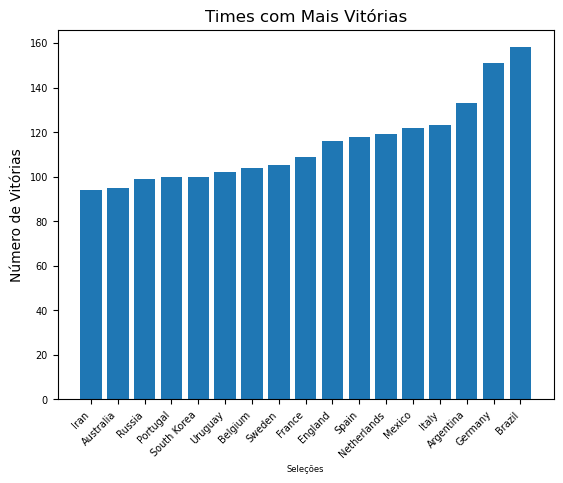

In [27]:
# Ordenar os times pelo número de vitórias em ordem decrescente
V_Wcup_filtro =V_Wcup_filtro.sort_values(ascending=True)

# Criar o gráfico de barras
plt.bar(V_Wcup_filtro.index, V_Wcup_filtro.values)

# Adicionar rótulos e título ao gráfico
plt.xlabel('Seleções',fontsize=6)
plt.ylabel('Número de Vitórias')
plt.title('Times com Mais Vitórias')



# Rotacionar os rótulos dos times para melhor visualização
plt.xticks(rotation=45, ha='right',fontsize=7)
plt.yticks(fontsize=7)

# Mostrar o gráfico
plt.show()